Xác định các thư viện cần dùng cho quá trình phân tích thống kê mô tả và đưa vào mã lệnh

In [34]:
import numpy as np
import pandas as pd
import statistics as sta
from scipy import stats
import matplotlib.pyplot as plt
import statsmodels.api as sm
import math
import seaborn as sns

In [35]:
#Liên kết google drive và google colab
#from google.colab import drive
#drive.mount('/content/gdrive')

In [36]:
#Đọc dữ liệu
#df = pd.read_csv("/content/gdrive/MyDrive/PTDL/Do An/Inc_Exp_Data.csv")
df = pd.read_csv("Inc_Exp_Data.csv")

In [37]:
df.head()

,Mthly_HH_Income,Mthly_HH_Expense,No_of_Fly_Members,Emi_or_Rent_Amt,Annual_HH_Income,Highest_Qualified_Member,No_of_Earning_Members
0,5000,8000,3,2000,64200,Under-Graduate,1
1,6000,7000,2,3000,79920,Illiterate,1
2,10000,4500,2,0,112800,Under-Graduate,1
3,10000,2000,1,0,97200,Illiterate,1
4,12500,12000,2,3000,147000,Graduate,1


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Mthly_HH_Income           50 non-null     int64 
 1   Mthly_HH_Expense          50 non-null     int64 
 2   No_of_Fly_Members         50 non-null     int64 
 3   Emi_or_Rent_Amt           50 non-null     int64 
 4   Annual_HH_Income          50 non-null     int64 
 5   Highest_Qualified_Member  50 non-null     object
 6   No_of_Earning_Members     50 non-null     int64 
dtypes: int64(6), object(1)
memory usage: 2.9+ KB


Phân tích dữ liệu định lượng.

In [39]:
# Xác định và tạo Dataframes gồm các cột định lượng
df_dl = pd.DataFrame(columns = ['Mthly_HH_Income', 'Mthly_HH_Expense', 'Emi_or_Rent_Amt', 'Annual_HH_Income', ], data = df)

In [40]:
df_dl.head()

,Mthly_HH_Income,Mthly_HH_Expense,Emi_or_Rent_Amt,Annual_HH_Income
0,5000,8000,2000,64200
1,6000,7000,3000,79920
2,10000,4500,0,112800
3,10000,2000,0,97200
4,12500,12000,3000,147000


In [41]:
#Dùng hàm describle để tính trung bình, min, max tứ phân vị của mỗi cột định lượng
df_dl.describe()

,Mthly_HH_Income,Mthly_HH_Expense,Emi_or_Rent_Amt,Annual_HH_Income
count,50.000000,50.000000,50.000000,5.000000e+01
mean,41558.000000,18818.000000,3060.000000,4.900190e+05
std,26097.908979,12090.216824,6241.434948,3.201358e+05
min,5000.000000,2000.000000,0.000000,6.420000e+04
25%,23550.000000,10000.000000,0.000000,2.587500e+05
50%,35000.000000,15500.000000,0.000000,4.474200e+05
75%,50375.000000,25000.000000,3500.000000,5.947200e+05
max,100000.000000,50000.000000,35000.000000,1.404000e+06


<AxesSubplot:>

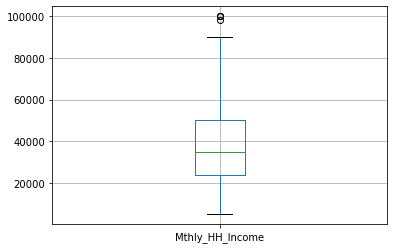

In [42]:
#Vẽ biểu đồ boxplot cho Mthly_HH_Income.
df_dl.boxplot(['Mthly_HH_Income'])

<AxesSubplot:>

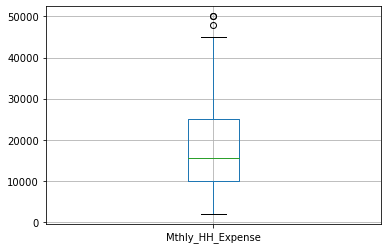

In [43]:
#Vẽ biểu đồ boxplot cho Mthly_HH_Expense.
df_dl.boxplot(['Mthly_HH_Expense'])

<AxesSubplot:>

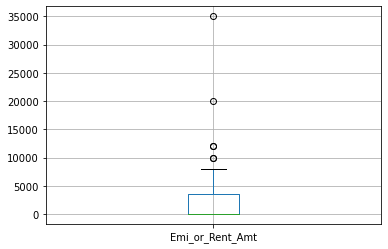

In [44]:
#Vẽ biểu đồ boxplot cho Emi_or_Rent_Amt.
df_dl.boxplot(['Emi_or_Rent_Amt'])

<AxesSubplot:>

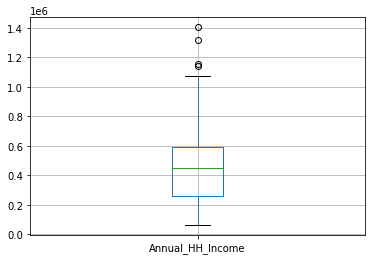

In [45]:
#Vẽ biểu đồ boxplot cho Annual_HH_Income.
df_dl.boxplot(['Annual_HH_Income'])

#**Độ tương quan giữa các cột định lượng**

In [46]:
# Ma trận biểu diễn hệ số tương quan - coefficient of variation
correlation = df_dl.corr(method = "pearson")
correlation

,Mthly_HH_Income,Mthly_HH_Expense,Emi_or_Rent_Amt,Annual_HH_Income
Mthly_HH_Income,1.000000,0.649215,0.036976,0.970315
Mthly_HH_Expense,0.649215,1.000000,0.405280,0.591222
Emi_or_Rent_Amt,0.036976,0.405280,1.000000,0.002716
Annual_HH_Income,0.970315,0.591222,0.002716,1.000000


<AxesSubplot:xlabel='Mthly_HH_Income', ylabel='Mthly_HH_Expense'>

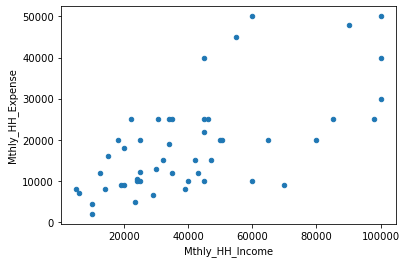

In [47]:
df_dl.plot.scatter(x = "Mthly_HH_Income", y = "Mthly_HH_Expense")

Heat map (biểu đồ nhiệt)

<AxesSubplot:title={'center':'Hệ số tương quan'}>

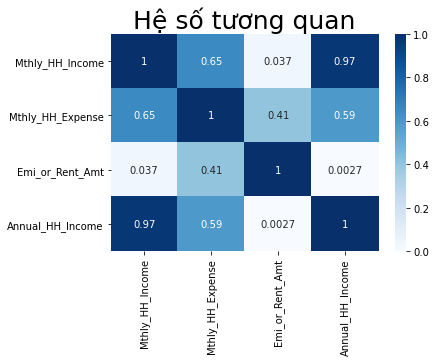

In [48]:
plt.title("Hệ số tương quan", fontsize = 25)
sns.heatmap(correlation, annot = True, cmap = "Blues",vmin = 0, vmax = 1)

Pair plot (biểu đồ cặp)

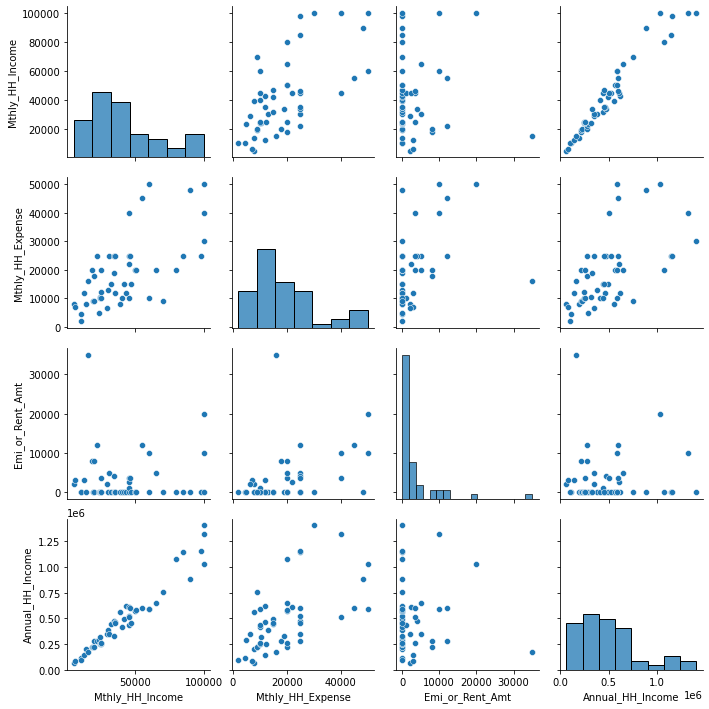

In [49]:
sns.pairplot(df_dl)

Với dữ liệu định tính